# Purpose
* Extract features from the entire dataset by subtracting adjacent points. Use the dif_next_point function.
* Exclude records 102, 104, 107, 207 from analysis since those contain paced beats.
* For record 114 pull the second signal since for this one the MLII and V5 signals have been switched
* write 2 compiled datasets - one raw one from the differnce
* finally, extract a shorter beat +/- 0.3 sec (0.6 sec window), since this is enough to cover a heartbeat and will reduce the number of features

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import wfdb
import os
import sys
sys.path.insert(0, os.path.abspath('../../src/'))
import processing_funcs
import feature_extraction_funcs as fef

In [16]:
import importlib
importlib.reload(fef)

<module 'feature_extraction_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/feature_extraction_funcs.py'>

In [15]:
raw_df, dif_df = fef.process_one_record(path, '100', 0.6)

In [16]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,Patient_number,Label,Label_class,Output_label
1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,-0.375,-0.365,-0.365,-0.360,-0.360,-0.365,100,N,N,0.0
2,-0.310,-0.325,-0.310,-0.300,-0.290,-0.31,-0.325,-0.330,-0.315,-0.300,...,-0.470,-0.475,-0.460,-0.450,-0.445,-0.440,100,N,N,0.0
3,-0.330,-0.335,-0.355,-0.360,-0.355,-0.35,-0.340,-0.345,-0.345,-0.345,...,-0.395,-0.395,-0.390,-0.375,-0.360,-0.340,100,N,N,0.0
4,-0.365,-0.380,-0.370,-0.365,-0.350,-0.35,-0.350,-0.370,-0.365,-0.345,...,-0.375,-0.350,-0.335,-0.320,-0.315,-0.320,100,N,N,0.0
5,-0.320,-0.340,-0.340,-0.350,-0.365,-0.36,-0.345,-0.345,-0.350,-0.350,...,-0.420,-0.410,-0.425,-0.420,-0.405,-0.380,100,N,N,0.0


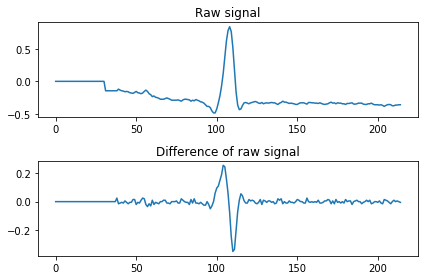

In [20]:
fig, ax = plt.subplots(2)
ax[0].plot(raw_df.values[0,0:215])
ax[0].set_title("Raw signal")
ax[1].plot(dif_df.values[0,0:215])
ax[1].set_title("Difference of raw signal")
plt.tight_layout()

In [24]:
raw_labeled_beat_full_df, dif_labeled_beat_full_df = fef.process_whole_dataset(fef.path, fef.file_list, 0.6)

In [34]:
raw_labeled_beat_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,Patient_number,Label,Label_class,Output_label
0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,-0.375,-0.365,-0.365,-0.360,-0.360,-0.365,100,N,N,0.0
1,-0.310,-0.325,-0.310,-0.300,-0.290,-0.31,-0.325,-0.330,-0.315,-0.300,...,-0.470,-0.475,-0.460,-0.450,-0.445,-0.440,100,N,N,0.0
2,-0.330,-0.335,-0.355,-0.360,-0.355,-0.35,-0.340,-0.345,-0.345,-0.345,...,-0.395,-0.395,-0.390,-0.375,-0.360,-0.340,100,N,N,0.0
3,-0.365,-0.380,-0.370,-0.365,-0.350,-0.35,-0.350,-0.370,-0.365,-0.345,...,-0.375,-0.350,-0.335,-0.320,-0.315,-0.320,100,N,N,0.0
4,-0.320,-0.340,-0.340,-0.350,-0.365,-0.36,-0.345,-0.345,-0.350,-0.350,...,-0.420,-0.410,-0.425,-0.420,-0.405,-0.380,100,N,N,0.0


In [35]:
dif_labeled_beat_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,Patient_number,Label,Label_class,Output_label
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.010,0.000,0.005,0.000,-0.005,-0.005,100,N,N,0.0
1,-0.015,0.015,0.010,0.010,-0.020,-0.015,-0.005,0.015,0.015,-0.005,...,-0.005,0.015,0.010,0.005,0.005,0.005,100,N,N,0.0
2,-0.005,-0.020,-0.005,0.005,0.005,0.010,-0.005,0.000,0.000,0.000,...,0.000,0.005,0.015,0.015,0.020,0.005,100,N,N,0.0
3,-0.015,0.010,0.005,0.015,0.000,0.000,-0.020,0.005,0.020,0.000,...,0.025,0.015,0.015,0.005,-0.005,-0.005,100,N,N,0.0
4,-0.020,0.000,-0.010,-0.015,0.005,0.015,0.000,-0.005,0.000,0.000,...,0.010,-0.015,0.005,0.015,0.025,0.010,100,N,N,0.0


In [36]:
raw_labeled_beat_full_df.to_csv('../../Data_processed/raw_full_ds_window06.csv')

In [37]:
dif_labeled_beat_full_df.to_csv('../../Data_processed/dif_full_ds_window06.csv')

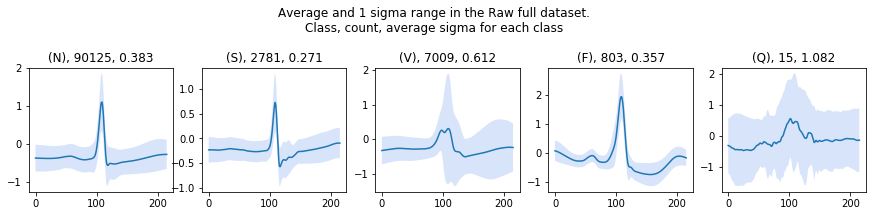

In [40]:
fef.plot_ave_std(raw_labeled_beat_full_df, 'Raw full dataset')

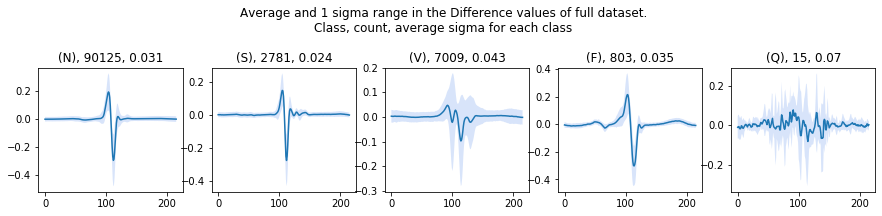

In [41]:
fef.plot_ave_std(dif_labeled_beat_full_df, 'Difference values of full dataset')

In [46]:
raw_train_df, raw_test_df = fef.split_train_test(raw_labeled_beat_full_df, fef.train, fef.test)

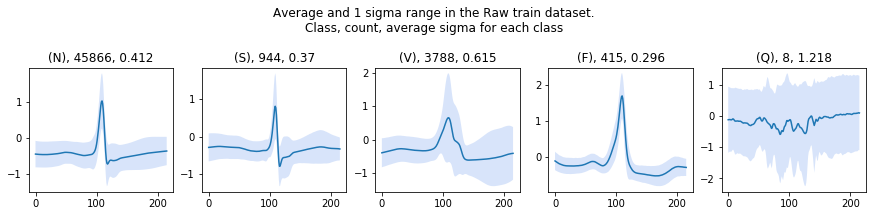

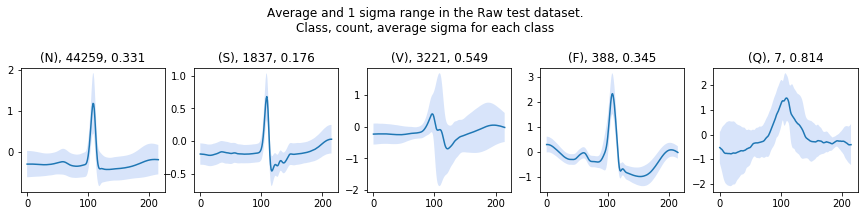

In [47]:
fef.plot_ave_std(raw_train_df, 'Raw train dataset')
fef.plot_ave_std(raw_test_df, 'Raw test dataset')

In [48]:
raw_train_df.to_csv('../../Data_processed/raw_train_ds_window06.csv')
raw_test_df.to_csv('../../Data_processed/raw_test_ds_window06.csv')

In [49]:
dif_train_df, dif_test_df = fef.split_train_test(dif_labeled_beat_full_df, fef.train, fef.test)

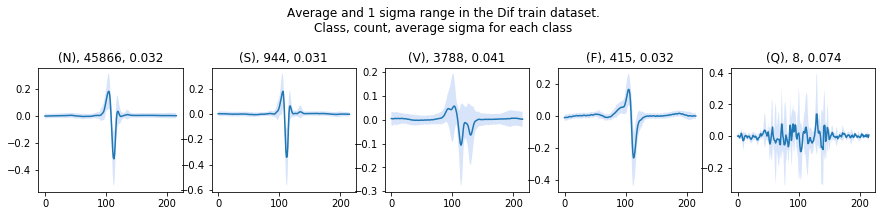

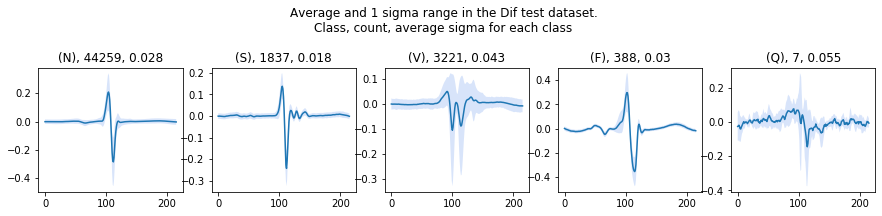

In [50]:
fef.plot_ave_std(dif_train_df, 'Dif train dataset')
fef.plot_ave_std(dif_test_df, 'Dif test dataset')

In [51]:
dif_train_df.to_csv('../../Data_processed/dif_train_ds_window06.csv')
dif_test_df.to_csv('../../Data_processed/dif_test_ds_window06.csv')

Note that in Chazal et al train-test split records 201 and 202 which are from the same patient are split between train and test sets. I will correct this by moving 202 to train set. Next, I would like to try the absolute value of the consecutive point difference.

In [5]:
raw_df, dif_df = fef.process_one_record(fef.path, '100', 0.6)

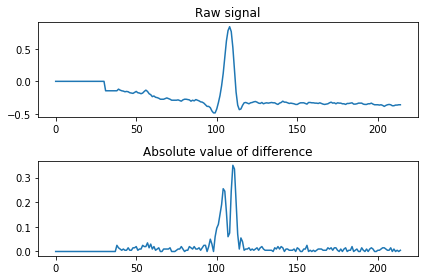

In [6]:
fig, ax = plt.subplots(2)
ax[0].plot(raw_df.values[0,0:215])
ax[0].set_title("Raw signal")
ax[1].plot(dif_df.values[0,0:215])
ax[1].set_title("Absolute value of difference")
plt.tight_layout()

In [7]:
raw_labeled_beat_full_df, abs_dif_labeled_beat_full_df = fef.process_whole_dataset(fef.path, fef.file_list, 0.6)

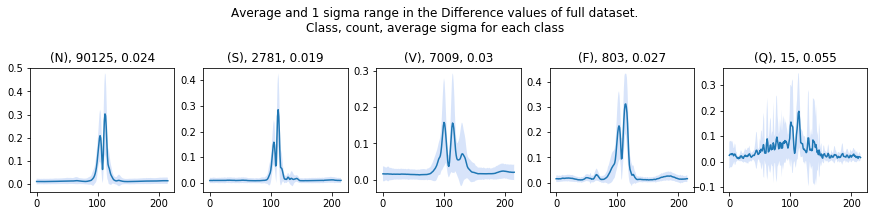

In [8]:
fef.plot_ave_std(abs_dif_labeled_beat_full_df, 'Difference values of full dataset')

First 50 points and 170 onwards are uninformative, drop those columns. Also drop Q class, since there are only 15 beats remaining in this class.

In [10]:
cols_to_drop = list(range(0,50)) + list(range(170,216))
print(abs_dif_labeled_beat_full_df.values.shape)
abs_dif_labeled_beat_full_df.drop(columns=cols_to_drop, axis=1, inplace=True)
print(abs_dif_labeled_beat_full_df.values.shape)

(100733, 220)
(100733, 124)


In [11]:
abs_dif_labeled_beat_full_df = abs_dif_labeled_beat_full_df[abs_dif_labeled_beat_full_df.Label_class!='Q']
abs_dif_labeled_beat_full_df.Label_class.unique()

array(['N', 'S', 'V', 'F'], dtype=object)

In [13]:
abs_dif_train_df, abs_dif_test_df = fef.split_train_test(abs_dif_labeled_beat_full_df, fef.train, fef.test)

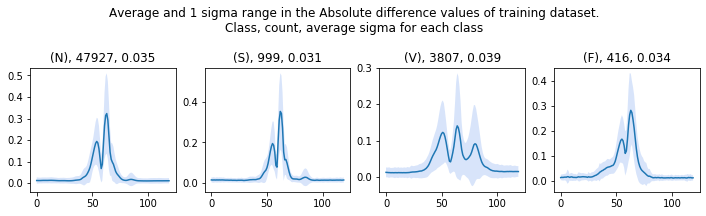

In [17]:
fef.plot_ave_std(abs_dif_train_df, 'Absolute difference values of training dataset')

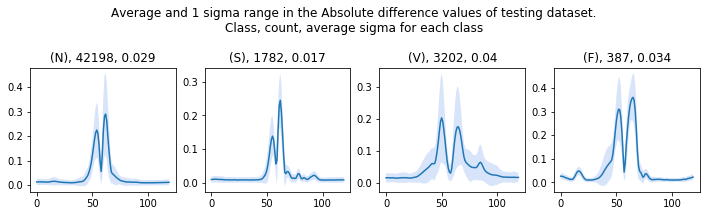

In [18]:
fef.plot_ave_std(abs_dif_test_df, 'Absolute difference values of testing dataset')

In [43]:
abs_dif_train_df = abs_dif_train_df.reset_index()
abs_dif_train_df.drop('index', axis=1, inplace=True)
abs_dif_test_df = abs_dif_test_df.reset_index()
abs_dif_test_df.drop('index', axis=1, inplace=True)

What would the graphs look like if I scaled all the columns 0-1?

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = abs_dif_train_df.drop(columns = ['Patient_number', 'Label', 'Label_class', 'Output_label'], axis=1).values
x_train_scaled = scaler.fit_transform(x_train)
x_test = abs_dif_test_df.drop(columns = ['Patient_number', 'Label', 'Label_class', 'Output_label'], axis=1).values
x_test_scaled = scaler.transform(x_test)
print(x_train.shape)
print(x_train_scaled.shape)

(53149, 120)
(53149, 120)


In [46]:
x_train_scaled_df = pd.DataFrame(x_train_scaled)
print(x_train_scaled_df.values.shape)
x_train_scaled_df = pd.concat([x_train_scaled_df, abs_dif_train_df[['Patient_number', 'Label', 'Label_class', 'Output_label']]], axis=1)
print(x_train_scaled_df.shape)
x_test_scaled_df = pd.DataFrame(x_test_scaled)
x_test_scaled_df = pd.concat([x_test_scaled_df, abs_dif_test_df[['Patient_number', 'Label', 'Label_class', 'Output_label']]], axis=1)

(53149, 120)
(53149, 124)


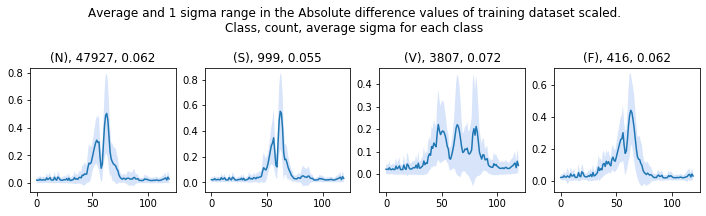

In [47]:
fef.plot_ave_std(x_train_scaled_df, 'Absolute difference values of training dataset scaled')

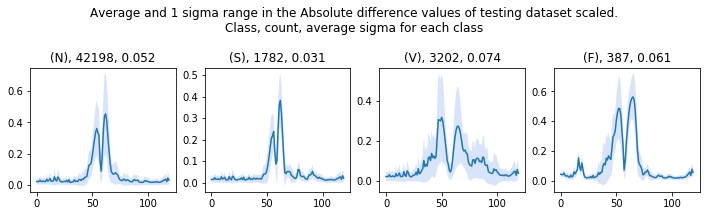

In [48]:
fef.plot_ave_std(x_test_scaled_df, 'Absolute difference values of testing dataset scaled')

Looks noisy. What if I scaled each row between 0-1 instead of scaling columns?

In [50]:
scaler = MinMaxScaler()
x_train = abs_dif_train_df.drop(columns = ['Patient_number', 'Label', 'Label_class', 'Output_label'], axis=1).values
x_train_scaled = scaler.fit_transform(x_train.T).T
scaler = MinMaxScaler()
x_test = abs_dif_test_df.drop(columns = ['Patient_number', 'Label', 'Label_class', 'Output_label'], axis=1).values
x_test_scaled = scaler.fit_transform(x_test.T).T

In [51]:
x_train_scaled_df = pd.DataFrame(x_train_scaled)
print(x_train_scaled_df.values.shape)
x_train_scaled_df = pd.concat([x_train_scaled_df, abs_dif_train_df[['Patient_number', 'Label', 'Label_class', 'Output_label']]], axis=1)
print(x_train_scaled_df.shape)
x_test_scaled_df = pd.DataFrame(x_test_scaled)
x_test_scaled_df = pd.concat([x_test_scaled_df, abs_dif_test_df[['Patient_number', 'Label', 'Label_class', 'Output_label']]], axis=1)

(53149, 120)
(53149, 124)


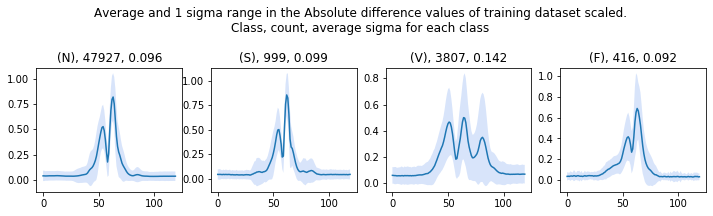

In [52]:
fef.plot_ave_std(x_train_scaled_df, 'Absolute difference values of training dataset scaled')

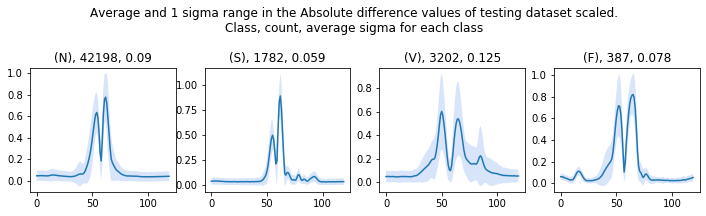

In [53]:
fef.plot_ave_std(x_test_scaled_df, 'Absolute difference values of testing dataset scaled')

Save both scaled and unscaled datasets and fit cnn.

In [54]:
abs_dif_train_df.to_csv('../../Data_processed/abs_dif_train_ds_040120.csv')
abs_dif_test_df.to_csv('../../Data_processed/abs_dif_test_ds_040120.csv')
x_train_scaled_df.to_csv('../../Data_processed/abs_dif_train_ds_scaled_040120.csv')
x_test_scaled_df.to_csv('../../Data_processed/abs_dif_test_ds_scaled_040120.csv')